In [ ]:
pip install matplotlib-venn
pip install pandas numpy matplotlib seaborn scikit-learn



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_score, recall_score
from matplotlib_venn import venn2, venn2_circles
from sklearn.svm import SVC

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Penny.csv")

In [ ]:
#dropping infinity values
df['P/E Ratio'] = df['P/E Ratio'].replace('Infinity', np.inf)
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df

,Unnamed: 0,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,PNK,1
1,1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,PNK,1
2,2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,PNK,1
3,3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,NYQ,0
4,4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,NYQ,0
...,...,...,...,...,...,...,...,...,...,...
489,489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,NYQ,0
490,490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,PNK,1
491,491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,NYQ,0
492,492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,NMS,0


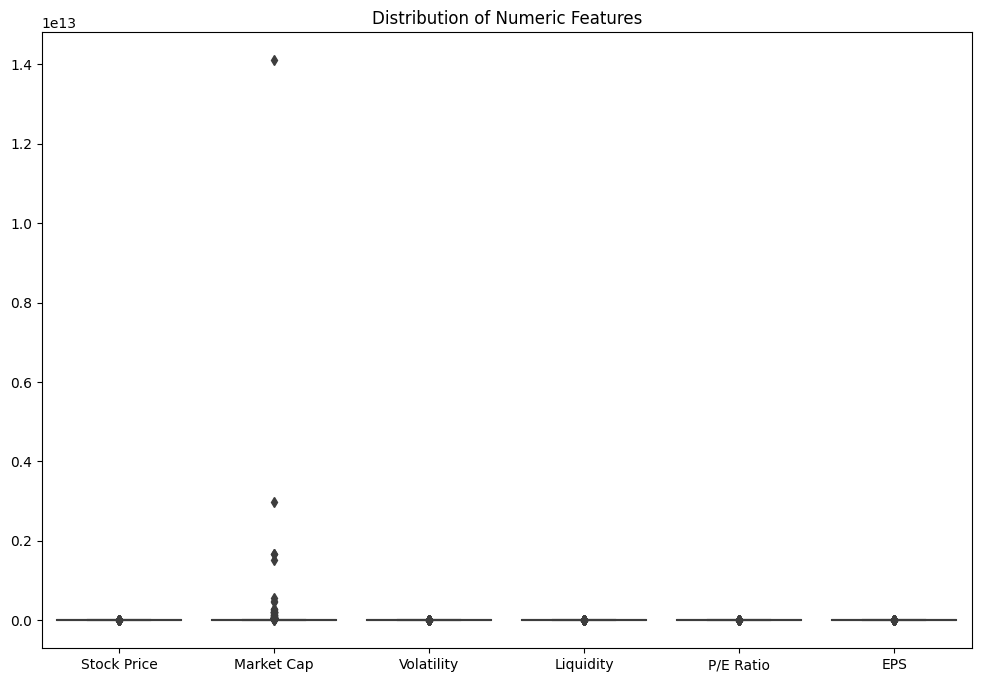

In [ ]:
# Numeric features
numeric_features = ['Stock Price', 'Market Cap', 'Volatility', 'Liquidity', 'P/E Ratio', 'EPS']

# Box plots for numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_features])
plt.title('Distribution of Numeric Features')
plt.show()



<Figure size 1200x800 with 0 Axes>

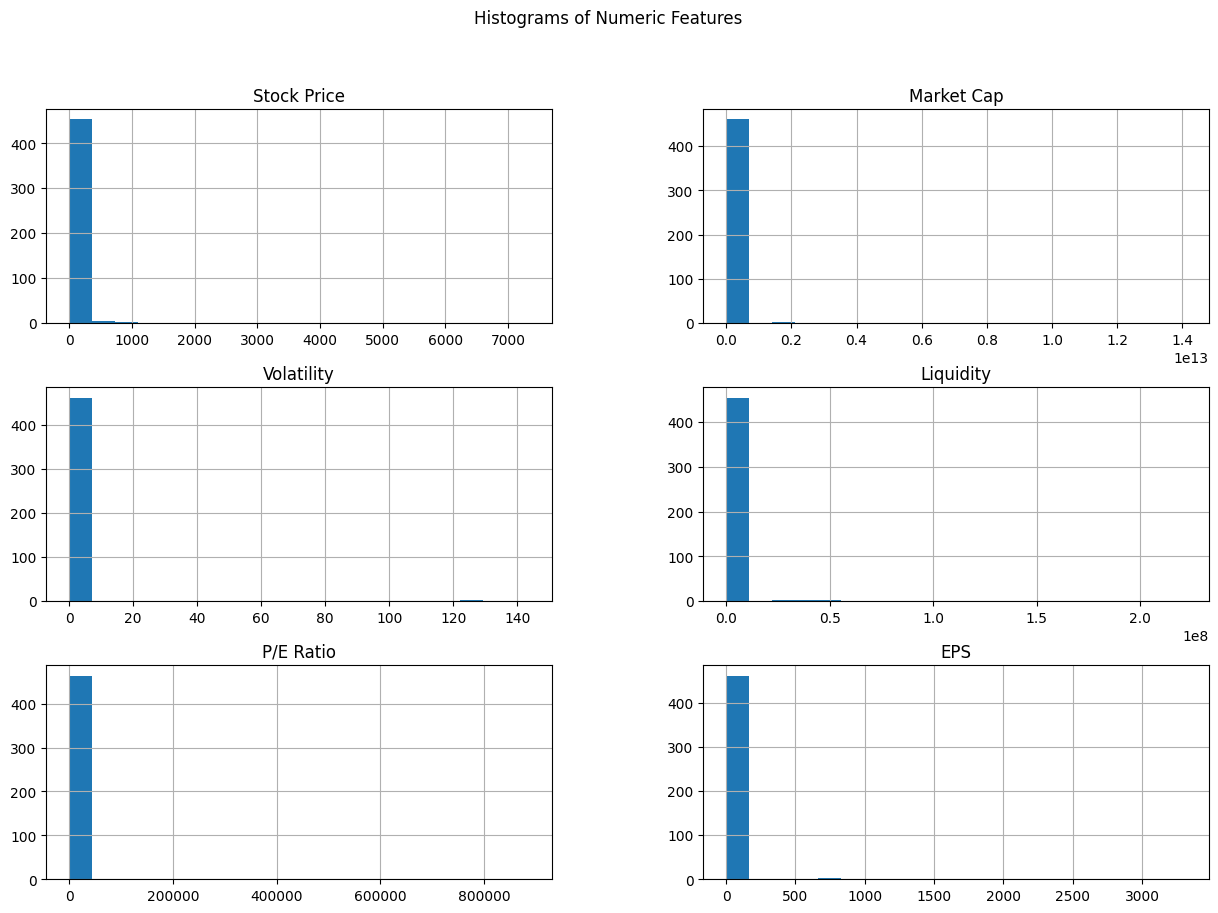

In [ ]:
# Histograms for numeric features
plt.figure(figsize=(12, 8))
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Features')
plt.show()

In [ ]:
X = df.drop(['Penny or Not','Stock','Unnamed: 0','Listing Exchange'], axis=1)
y = df['Penny or Not']
# Standardize numerical features
numerical_columns = ['Stock Price', 'Market Cap', 'Volatility', 'Liquidity', 'P/E Ratio', 'EPS',]


scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X

,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS
0,-0.062842,-0.083321,-0.082584,-0.164648,-0.047050,-0.079974
1,-0.065488,-0.083509,-0.083405,-0.164657,-0.047056,-0.079974
2,-0.210938,-0.093840,-0.069522,-0.162040,-0.047190,-0.110936
3,0.145109,-0.080826,-0.082737,-0.128644,-0.046966,-0.051359
4,-0.083881,-0.084925,-0.083318,-0.100750,-0.046523,-0.100662
...,...,...,...,...,...,...
489,-0.192609,-0.066162,-0.082549,0.148806,-0.046990,-0.107714
490,-0.207763,-0.093805,-0.076492,-0.164657,-0.043533,-0.110936
491,0.175927,-0.085519,-0.082708,-0.141386,-0.046970,-0.045645
492,-0.191953,-0.084905,-0.082683,1.681984,-0.046925,-0.108079


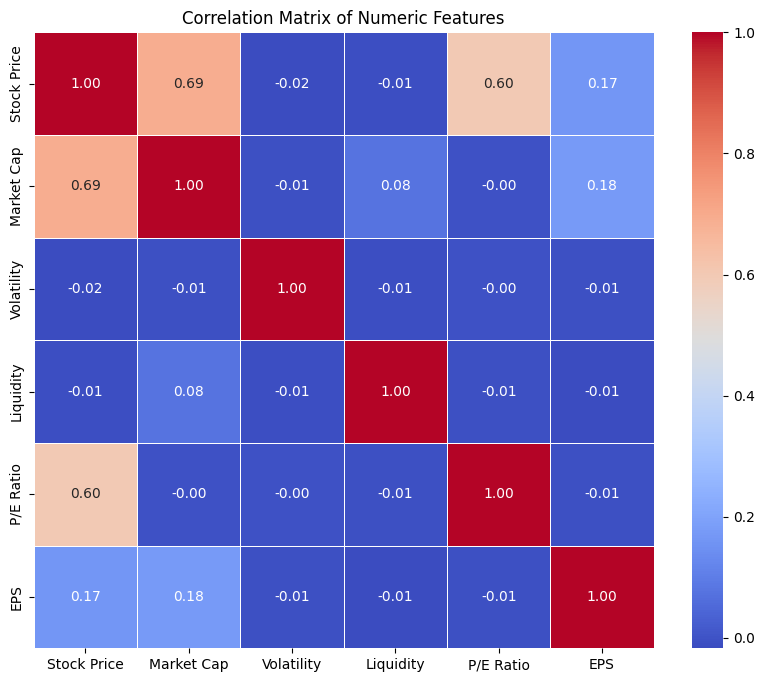

In [ ]:
correlation_matrix = df[numeric_features].corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
#Regression Model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training set
logreg_model.fit(X_train, y_train)




LogisticRegression(random_state=42)

In [ ]:
# Make predictions on the validation set
y_val_pred = logreg_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)

print(f'Validation Accuracy: {accuracy_val}')
print(f'Confusion Matrix (Validation):\n{conf_matrix_val}')

Validation Accuracy: 0.7571428571428571
Confusion Matrix (Validation):
[[22 10]
 [ 7 31]]


In [ ]:
# Test the model on the test set
y_test_pred = logreg_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print(f'Test Accuracy: {accuracy_test}')
print(f'Confusion Matrix (Test):\n{conf_matrix_test}')

Test Accuracy: 0.8285714285714286
Confusion Matrix (Test):
[[29  8]
 [ 4 29]]


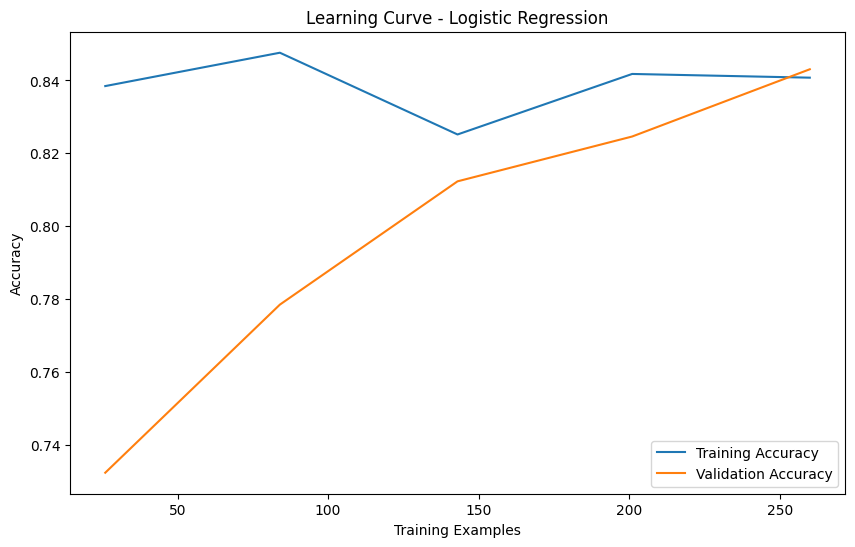

In [ ]:
# Draw the learning curve
train_sizes, train_scores, val_scores = learning_curve(logreg_model, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy')
plt.title('Learning Curve - Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Precision and Recall
precision_logreg = precision_score(y_test, y_val_pred)
recall_logreg = recall_score(y_test, y_val_pred)

print(f'Logistic Regression - Precision: {precision_logreg:.2f}, Recall: {recall_logreg:.2f}')


Logistic Regression - Precision: 0.49, Recall: 0.61


In [ ]:
#Updated Model

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
df['Listing Exchange'] = label_encoder.fit_transform(df['Listing Exchange'])
df

,Unnamed: 0,Stock,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange,Penny or Not
0,0,UEPEO,70.050003,7153786368,0.019124,100,13.727220,5.103,6,1
1,1,UEPCP,68.800003,7026131456,0.010468,0,13.482265,5.103,6,1
2,2,BLPG,0.080000,660012,0.156879,30001,8.000000,0.010,6,1
3,3,AIZ,168.300003,8850998272,0.017511,412900,17.155962,9.810,5,0
4,4,ADC,60.110001,6063115264,0.011389,732700,35.358820,1.700,5,0
...,...,...,...,...,...,...,...,...,...,...
489,489,ASX,8.740000,18822725632,0.019495,3593900,16.185184,0.540,5,0
490,490,UNXP,1.580000,24635360,0.083375,0,158.000020,0.010,6,1
491,491,AYI,182.860001,5659114496,0.017825,266800,17.010233,10.750,5,0
492,492,AGNC,9.050000,6076867072,0.018083,21172000,18.854168,0.480,4,0


In [ ]:
X = df.drop(['Penny or Not','Stock','Unnamed: 0'], axis=1)
y = df['Penny or Not']


# Standardize numerical features
numerical_columns = ['Stock Price', 'Market Cap', 'Volatility', 'Liquidity', 'P/E Ratio', 'EPS','Listing Exchange']


scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
X

,Stock Price,Market Cap,Volatility,Liquidity,P/E Ratio,EPS,Listing Exchange
0,-0.062842,-0.083321,-0.082584,-0.164648,-0.047050,-0.079974,0.809234
1,-0.065488,-0.083509,-0.083405,-0.164657,-0.047056,-0.079974,0.809234
2,-0.210938,-0.093840,-0.069522,-0.162040,-0.047190,-0.110936,0.809234
3,0.145109,-0.080826,-0.082737,-0.128644,-0.046966,-0.051359,-0.093149
4,-0.083881,-0.084925,-0.083318,-0.100750,-0.046523,-0.100662,-0.093149
...,...,...,...,...,...,...,...
489,-0.192609,-0.066162,-0.082549,0.148806,-0.046990,-0.107714,-0.093149
490,-0.207763,-0.093805,-0.076492,-0.164657,-0.043533,-0.110936,0.809234
491,0.175927,-0.085519,-0.082708,-0.141386,-0.046970,-0.045645,-0.093149
492,-0.191953,-0.084905,-0.082683,1.681984,-0.046925,-0.108079,-0.995533


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [ ]:
# Reapplying Logistic Regression Model
logreg_model_updated = LogisticRegression(random_state=42)
logreg_model_updated.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Model Evaluation on Validation Set
y_val_pred_updated = logreg_model_updated.predict(X_val)
accuracy_val_updated = accuracy_score(y_val, y_val_pred_updated)
conf_matrix_val_updated = confusion_matrix(y_val, y_val_pred_updated)

print(f'Validation Accuracy for updated model: {accuracy_val_updated}')
print(f'Confusion Matrix (Validation) for updated model:\n{conf_matrix_val_updated}')


Validation Accuracy for updated model: 0.9857142857142858
Confusion Matrix (Validation) for updated model:
[[32  0]
 [ 1 37]]


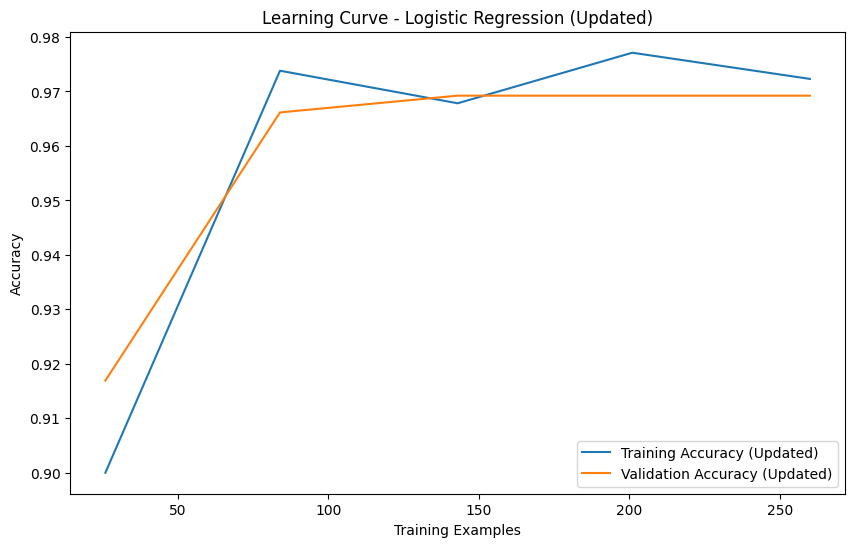

In [ ]:
# Learning Curve with New Feature
train_sizes, train_scores, val_scores = learning_curve(logreg_model_updated, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy (Updated)')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy (Updated)')
plt.title('Learning Curve - Logistic Regression (Updated)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Model Evaluation on Test Set
y_test_pred_updated = logreg_model_updated.predict(X_test)
accuracy_test_updated = accuracy_score(y_test, y_test_pred_updated)
conf_matrix_test_updated = confusion_matrix(y_test, y_test_pred_updated)

print(f'Test Accuracy updated: {accuracy_test_updated}')
print(f'Confusion Matrix  Updated(Test):\n{conf_matrix_test_updated}')


Test Accuracy updated: 0.9571428571428572
Confusion Matrix  Updated(Test):
[[37  0]
 [ 3 30]]


In [ ]:
precision_logreg_updated = precision_score(y_test, y_test_pred_updated)
recall_logreg_Updated = recall_score(y_test, y_test_pred_updated)


print(f'Logistic Regression Updated- Precision: {precision_logreg_updated:.2f}, Recall: {recall_logreg_Updated:.2f}')


Logistic Regression Updated- Precision: 1.00, Recall: 0.91


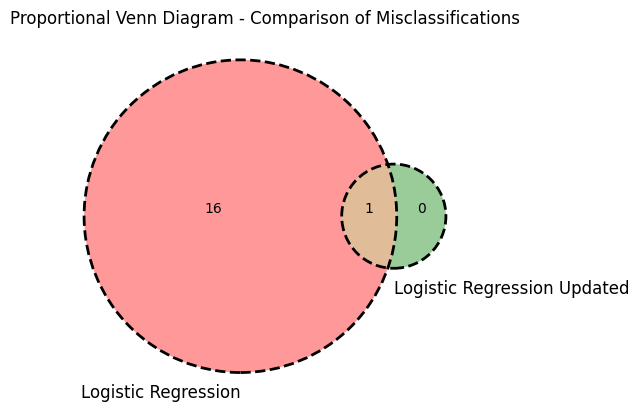

In [ ]:
# Extracting indices of misclassifications
misclass_indices_logreg = np.where(y_val != y_val_pred)[0]
misclass_indices_other = np.where(y_val != y_val_pred_updated)[0]

# Assuming misclass_indices_logreg and misclass_indices_other are the misclassification indices
set_logreg = set(misclass_indices_logreg)
set_other = set(misclass_indices_other)

# Create a proportional Venn diagram
venn_labels = {'100': f'{len(set_logreg - set_other)}\n',
               '010': f'{len(set_other - set_logreg)}\n',
               '110': f'{len(set_logreg & set_other)}\n'}

venn_diagram = venn2(subsets=(len(set_logreg), len(set_other), len(set_logreg & set_other)),
                     set_labels=('Logistic Regression', 'Logistic Regression Updated'))

venn_diagram.get_label_by_id('100').set_text(venn_labels['100'])
venn_diagram.get_label_by_id('010').set_text(venn_labels['010'])
venn_diagram.get_label_by_id('110').set_text(venn_labels['110'])

# Draw circles around the sets
venn2_circles(subsets=(len(set_logreg), len(set_other), len(set_logreg & set_other)), linestyle='dashed')

plt.title('Proportional Venn Diagram - Comparison of Misclassifications')
plt.show()


In [ ]:
#Support Vector Machine


In [ ]:
# Initialize and train SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)





SVC(kernel='linear', random_state=42)

In [ ]:
# Predictions on the validation set
y_val_pred_svm = svm_model.predict(X_val)

# Evaluate SVM model on the validation set
accuracy_val_svm = accuracy_score(y_val, y_val_pred_svm)
conf_matrix_val_svm = confusion_matrix(y_val, y_val_pred_svm)

print(f'SVM Validation Accuracy: {accuracy_val_svm}')
print(f'Confusion Matrix (SVM Validation):\n{conf_matrix_val_svm}')

SVM Validation Accuracy: 1.0
Confusion Matrix (SVM Validation):
[[32  0]
 [ 0 38]]


In [ ]:
# Predictions on the test set
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate SVM model on the test set
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)
conf_matrix_test_svm = confusion_matrix(y_test, y_test_pred_svm)

print(f'SVM Test Accuracy: {accuracy_test_svm}')
print(f'Confusion Matrix (SVM Test):\n{conf_matrix_test_svm}')

SVM Test Accuracy: 0.9857142857142858
Confusion Matrix (SVM Test):
[[37  0]
 [ 1 32]]


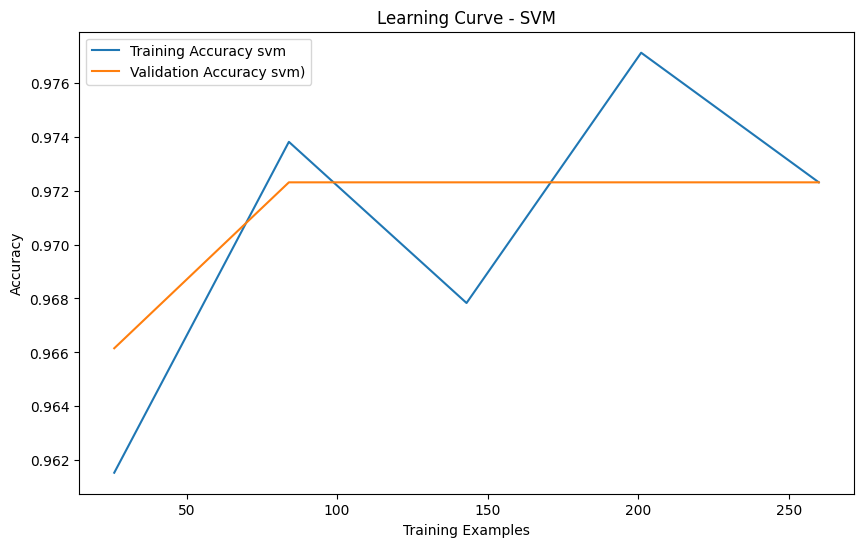

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(svm_model, X_train, y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy svm')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Accuracy svm)')
plt.title('Learning Curve - SVM')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
precision_svm = precision_score(y_val, y_val_pred_svm)
recall_svm = recall_score(y_val, y_val_pred_svm)


print(f'SVM- Precision: {precision_svm:.2f}, Recall: {recall_svm:.2f}')


SVM- Precision: 1.00, Recall: 1.00


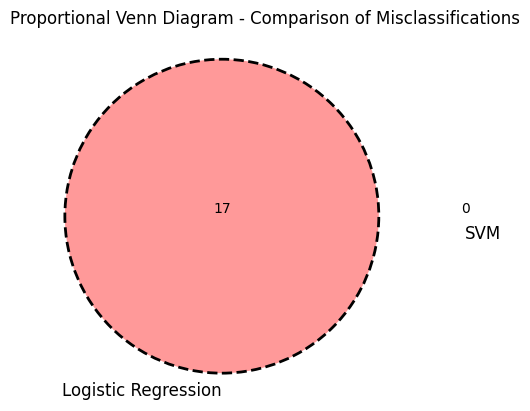

In [ ]:
misclass_indices_logreg = np.where(y_val != y_val_pred)[0]
misclass_indices_other = np.where(y_val != y_val_pred_svm)[0]

# Assuming misclass_indices_logreg and misclass_indices_other are the misclassification indices
set_logreg = set(misclass_indices_logreg)
set_other = set(misclass_indices_other)

# Create a proportional Venn diagram
venn_labels = {'100': f'{len(set_logreg - set_other)}\n',
               '010': f'{len(set_other - set_logreg)}\n',
               '110': f'{len(set_logreg & set_other)}\n'}

venn_diagram = venn2(subsets=(len(set_logreg), len(set_other), len(set_logreg & set_other)),
                     set_labels=('Logistic Regression', 'SVM'))

venn_diagram.get_label_by_id('100').set_text(venn_labels['100'])
venn_diagram.get_label_by_id('010').set_text(venn_labels['010'])

# Draw circles around the sets
venn2_circles(subsets=(len(set_logreg), len(set_other), len(set_logreg & set_other)), linestyle='dashed')

plt.title('Proportional Venn Diagram - Comparison of Misclassifications')
plt.show()